# 1주차 Report

1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.

    (SVM, LR, RF, DT, KNN)

2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 머신러닝을 수행하라.

4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [18]:
df = pd.read_csv("C:\\Project\\Anaconda\\2nd_semester\\Data\\diabetes.csv")
#df = pd.read_csv("C:/Project/Anaconda/2nd_semester/Data/diabetes.csv") # \는 콜백문자 때문에 \\로 사용한다.
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

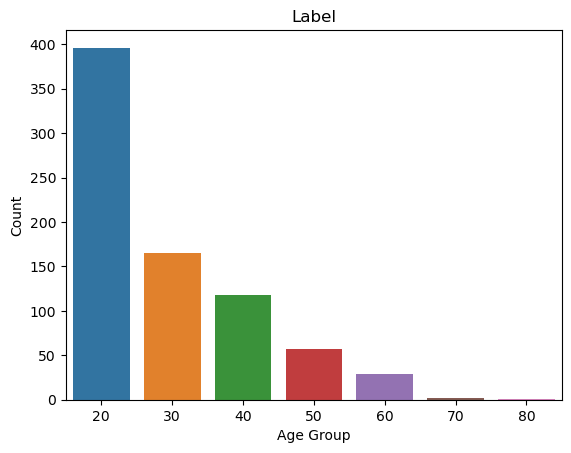

In [20]:
# Age를 10으로 나누어서 새로운 열 생성
df['Age_group'] = (df['Age'] // 10) * 10

# countplot 그리기
sns.countplot(data=df, x="Age_group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Label")

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,6,148,72,35,0,33.6,0.627,50,1,50
1,1,85,66,29,0,26.6,0.351,31,0,30
2,8,183,64,0,0,23.3,0.672,32,1,30
3,1,89,66,23,94,28.1,0.167,21,0,20
4,0,137,40,35,168,43.1,2.288,33,1,30
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60
764,2,122,70,27,0,36.8,0.340,27,0,20
765,5,121,72,23,112,26.2,0.245,30,0,30
766,1,126,60,0,0,30.1,0.349,47,1,40


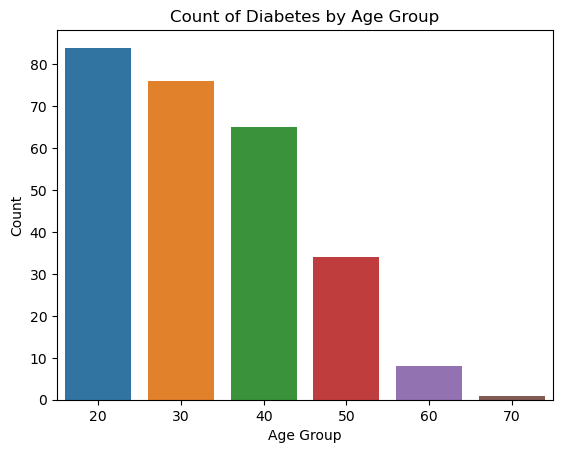

In [22]:
# Age_group 별 Outcome 확인

# Assuming your data is in a DataFrame 'df'
# Filter for Outcome == 1
df_outcome_1 = df[df['Outcome'] == 1]

# Plot the count of Age_group where Outcome == 1
sns.countplot(data=df_outcome_1, x='Age_group')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title('Count of Diabetes by Age Group')
plt.show()

In [23]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [24]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

X= 피쳐 값

y= 레이블 값 (결과 값)

In [25]:
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
0,6,148,72,35,0,33.6,0.627,50,50
1,1,85,66,29,0,26.6,0.351,31,30
2,8,183,64,0,0,23.3,0.672,32,30
3,1,89,66,23,94,28.1,0.167,21,20
4,0,137,40,35,168,43.1,2.288,33,30


In [26]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
603,7,150,78,29,126,35.2,0.692,54,50
118,4,97,60,23,0,28.2,0.443,22,20
247,0,165,90,33,680,52.3,0.427,23,20
157,1,109,56,21,135,25.2,0.833,23,20
468,8,120,0,0,0,30.0,0.183,38,30
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,60
192,7,159,66,0,0,30.4,0.383,36,30
629,4,94,65,22,0,24.7,0.148,21,20
559,11,85,74,0,0,30.1,0.300,35,30


# 1. Machine Learning (Outcome)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings # 필터 오류를 무시
warnings.filterwarnings('ignore')

#### confusion matrix?
true positive //        true negative

    TP          FP 

    FN          TN

    - Accuracy(Precision): TP / TP + FP
    - Recall:              TP / TP + FN

## SVM (Support Vector Machine)

In [29]:
from sklearn.svm import SVC
# SVC는 Support Vector Classification

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

pred_svm = clf_svm.predict(X_test) # 이번에는 테스트 데이터로 테스트한 값을 pred_svm에 저장

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78571
[[97 10]
 [23 24]]


## LR (Logistic Regression)

In [30]:
from sklearn.linear_model import LogisticRegression

# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.81818
[[97 10]
 [18 29]]


## RF (Random Forest)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_rf)))
print (confusion_matrix(y_test, pred_rf))


--- Radom Forest ---
0.78571
[[90 17]
 [16 31]]


## DT (Decision Tree)

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.79870
[[89 18]
 [13 34]]


## KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# 모델 선택 (분류 문제인 경우)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 모델 선택 (회귀 문제인 경우)
# knn_model = KNeighborsRegressor(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

# 예측 수행
y_pred = knn_model.predict(X_test)

# 성능 평가 (분류 문제인 경우)
print("\n--- KNN ---")
print ('{:.5f}'.format(accuracy_score(y_test, y_pred)))
print (confusion_matrix(y_test, y_pred))

# 성능 평가 (회귀 문제인 경우)
# mse = mean_squared_error(y_test, y_pred)
# print("평균제곱오차:", mse)


--- KNN ---
0.76623
[[88 19]
 [17 30]]


# 2. Deep Learning (Outcome)

In [34]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
762,9,89,62,0,0,22.5,0.142,33,30
127,1,118,58,36,94,33.3,0.261,23,20
564,0,91,80,0,0,32.4,0.601,27,20
375,12,140,82,43,325,39.2,0.528,58,50
663,9,145,80,46,130,37.9,0.637,40,40
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,60
192,7,159,66,0,0,30.4,0.383,36,30
629,4,94,65,22,0,24.7,0.148,21,20
559,11,85,74,0,0,30.1,0.300,35,30


In [36]:
y_test.shape

(192, 2)

In [37]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(15, input_shape=(X_train.shape[1], ), activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 390 (1.52 KB)
Trainable params: 390 (1.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50


18/18 [==============================] - 6s 50ms/step - loss: 0.8372 - accuracy: 0.6198 - val_loss: 0.6558 - val_accuracy: 0.6771
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.6424 - val_loss: 0.6402 - val_accuracy: 0.6771
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.6537 - accuracy: 0.6424 - val_loss: 0.6335 - val_accuracy: 0.6771
Epoch 4/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.6424 - val_loss: 0.6324 - val_accuracy: 0.6771
Epoch 5/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6526 - accuracy: 0.6424 - val_loss: 0.6314 - val_accuracy: 0.6771
Epoch 6/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6523 - accuracy: 0.6424 - val_loss: 0.6311 - val_accuracy: 0.6771
Epoch 7/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.6424 - val_loss: 0.6315 - val_accuracy: 0.6771
Epoch 8/50
1

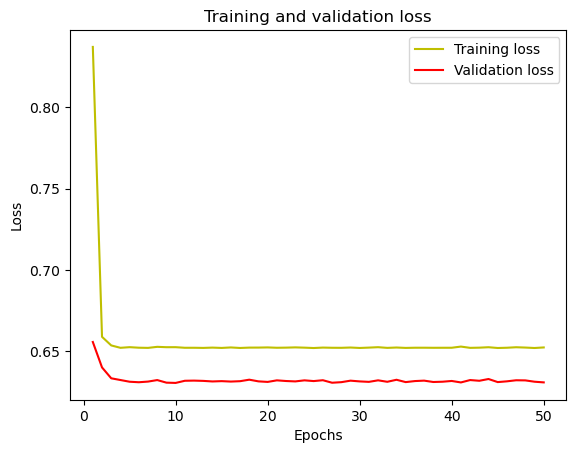

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

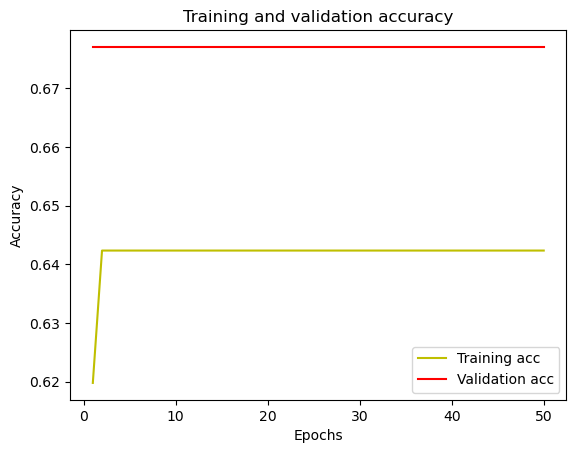

In [40]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192

[[130   0]
 [ 62   0]]


# 3. Machine Learning (BMI) 

In [44]:
df = pd.read_csv("C:\\Project\\Anaconda\\2nd_semester\\Data\\diabetes.csv")
#df = pd.read_csv("C:/Project/Anaconda/2nd_semester/Data/diabetes.csv") # \는 콜백문자 때문에 \\로 사용한다.
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
X=df.drop('BMI', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [46]:
y=df['BMI']
y.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


## SVR (Support Vector Regression)

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

clf_svm = SVR()
clf_svm.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

pred_svm = clf_svm.predict(X_test) # 이번에는 테스트 데이터로 테스트한 값을 pred_svm에 저장

mse = mean_squared_error(pred_svm, y_test)
print('--- MSE ---')
print('{:.5f}'.format(mse))

--- MSE ---
44.64493


## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = mean_squared_error(ly_preds, y_test)
print('--- MSE ---')
print('{:.5f}'.format(mse))

--- MSE ---
47.94585


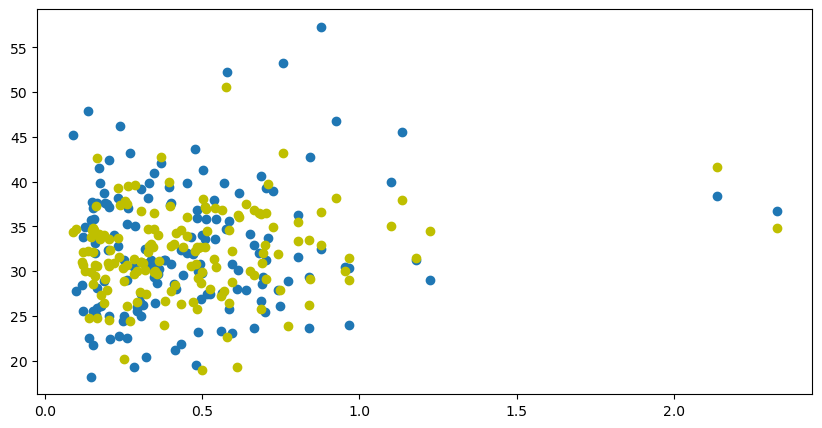

In [51]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['DiabetesPedigreeFunction'], y_test, label='y_test')
plt.scatter(X_test['DiabetesPedigreeFunction'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, model.predict(X_train), color='blue')
plt.show()         

# 4. Deep Learning (BMI)

In [65]:
df = pd.read_csv("C:\\Project\\Anaconda\\2nd_semester\\Data\\diabetes.csv")
#df = pd.read_csv("C:/Project/Anaconda/2nd_semester/Data/diabetes.csv") # \는 콜백문자 때문에 \\로 사용한다.

X = df.drop(['BMI', 'Outcome'], axis=1)  # 'Outcome'은 제외, BMI는 예측 대상
y = df['BMI']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,0.142,33
127,1,118,58,36,94,0.261,23
564,0,91,80,0,0,0.601,27
375,12,140,82,43,325,0.528,58
663,9,145,80,46,130,0.637,40
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
192,7,159,66,0,0,0.383,36
629,4,94,65,22,0,0.148,21
559,11,85,74,0,0,0.300,35


In [67]:
y_test

661    42.9
122    33.6
113    34.0
14     25.8
529    24.6
       ... 
366    27.6
301    31.6
382    25.4
140    21.1
463    27.6
Name: BMI, Length: 192, dtype: float64

MAE는 Mean Absolute Error의 약자로, 예측 값과 실제 값 간의 절대 오차의 평균을 측정하는 지표이다.

In [68]:
# 신경망 모델 구성
model = Sequential()

# 입력층과 은닉층
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# 출력층 (회귀를 위한 출력)
model.add(Dense(1, activation='relu'))

# 모델 컴파일 (회귀 문제이므로 손실 함수는 mean_squared_error 사용)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 요약 출력
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                512       
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3297 (12.88 KB)
Trainable params: 3297 

In [69]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/100
15/15 [==============================] - 4s 43ms/step - loss: 859.8428 - mae: 28.3050 - val_loss: 594.8319 - val_mae: 23.3973
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 420.3263 - mae: 18.6627 - val_loss: 179.6123 - val_mae: 11.7108
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 182.6714 - mae: 10.2948 - val_loss: 117.6762 - val_mae: 8.2728
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 114.8095 - mae: 8.0993 - val_loss: 85.1383 - val_mae: 7.1148
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 75.0287 - mae: 6.8425 - val_loss: 75.0353 - val_mae: 6.3953
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 66.0936 - mae: 6.3294 - val_loss: 77.6180 - val_mae: 6.4998
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 62.9082 - mae: 6.1774 - val_loss: 71.5190 - val_mae: 6.1363
Epoch 8/100
15/15 [==============================]

In [70]:
print(f'Test MSE: {test_loss}')
print(f'Test MAE: {test_mae}')

Test MSE: 56.27272415161133
Test MAE: 5.533458709716797


# CNN 

CNN은 Convolution Neural Network의 약자이다.

덴스 레이어에서 전체 노드가 연결되어 유닛 간 특징 추출이 어려웠던 반면,

CNN에서는 상위 노드와 하위 노드가 '부분적'으로 연결되어 유닛 간 특징 추출이 용이하다.

In [118]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [119]:
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [120]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [121]:
#one hot encoding 하기

y = pd.get_dummies(y).values

In [122]:
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

In [124]:
X_test.shape

(192, 8)

In [127]:
y_train.shape

(576, 2)

In [129]:
# 데이터 셋을 만들고 해당 셋으로 train, test를 만든다.

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :8], sequences[end_ix-1, 8:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [130]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# 8개의 features와 2개의 label이 합쳐진 train_set, test_set
print(train_set)

[[  9.  89.  62. ...  33.   1.   0.]
 [  1. 118.  58. ...  23.   1.   0.]
 [  0.  91.  80. ...  27.   1.   0.]
 ...
 [  4.  94.  65. ...  21.   1.   0.]
 [ 11.  85.  74. ...  35.   1.   0.]
 [  5. 136.  82. ...  69.   1.   0.]]


In [131]:
y_train

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [132]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(572, 5, 8) (572, 2)
(188, 5, 8) (188, 2)


In [133]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 8 2


In [134]:
X_train.shape[1]

5

In [135]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [136]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [137]:
# 신경망 모델 구축
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(32, 2, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Flatten()(x)
prediction = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 8)]            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 32)             544       
                                                                 
 dense_36 (Dense)            (None, 4, 64)             2112      
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 2)                 514       
                                                                 
Total params: 3170 (12.38 KB)
Trainable params: 3170 (12.38

In [140]:
from keras.callbacks import EarlyStopping

# 신경망 훈련, 검증 데이터 전달
#  callbacks = [early_stopping],
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=144, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
4/4 - 0s - loss: 0.3914 - accuracy: 0.8077 - val_loss: 0.6370 - val_accuracy: 0.6915 - 191ms/epoch - 48ms/step
Epoch 2/100
4/4 - 0s - loss: 0.4285 - accuracy: 0.8042 - val_loss: 0.6367 - val_accuracy: 0.7340 - 91ms/epoch - 23ms/step
Epoch 3/100
4/4 - 0s - loss: 0.4016 - accuracy: 0.8077 - val_loss: 0.6447 - val_accuracy: 0.7181 - 100ms/epoch - 25ms/step
Epoch 4/100
4/4 - 0s - loss: 0.4123 - accuracy: 0.7937 - val_loss: 0.6574 - val_accuracy: 0.6915 - 106ms/epoch - 26ms/step
Epoch 5/100
4/4 - 0s - loss: 0.3973 - accuracy: 0.8007 - val_loss: 0.6563 - val_accuracy: 0.6862 - 102ms/epoch - 25ms/step
Epoch 6/100
4/4 - 0s - loss: 0.4029 - accuracy: 0.8147 - val_loss: 0.6484 - val_accuracy: 0.6862 - 94ms/epoch - 24ms/step
Epoch 7/100
4/4 - 0s - loss: 0.4024 - accuracy: 0.8199 - val_loss: 0.6405 - val_accuracy: 0.7074 - 112ms/epoch - 28ms/step
Epoch 8/100
4/4 - 0s - loss: 0.4064 - accuracy: 0.8217 - val_loss: 0.6394 - val_accuracy: 0.7128 - 105ms/epoch - 26ms/step
Epoch 9/100
4/4 - 

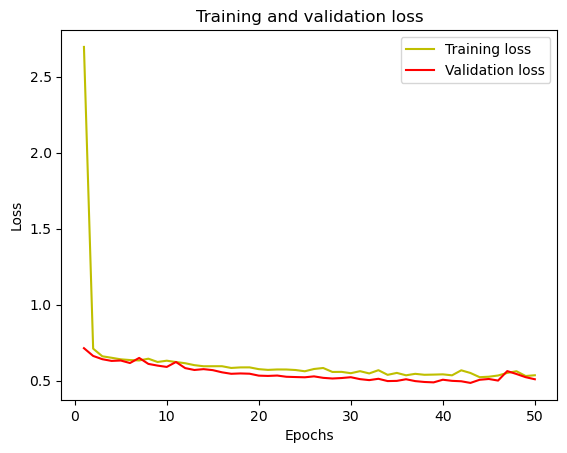

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력


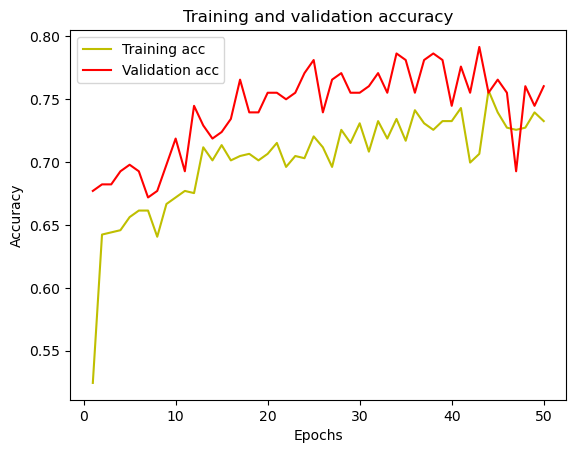

In [142]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [152]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print("\n----------------classification_report-----------------")
print(classification_report(y_test_class, y_pred_class))
print("\n------------------confusion_matrix--------------------")
print(confusion_matrix(y_test_class, y_pred_class))


----------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       130
           1       0.61      0.73      0.66        62

    accuracy                           0.76       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.78      0.76      0.77       192


------------------confusion_matrix--------------------
[[101  29]
 [ 17  45]]
